In [0]:
import keras
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 256
EPOCHS = 100

In [0]:
X_train = X_train.reshape((X_train.shape[0],NUM_ROWS*NUM_COLS))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0],NUM_ROWS*NUM_COLS))
X_test = X_test.astype('float32')/255

In [0]:
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [0]:
initializer = keras.initializers.glorot_normal(seed=None)
model = Sequential()
model.add(Dense(512, activation = 'relu',kernel_initializer=initializer, input_shape=(NUM_ROWS*NUM_COLS,)))
model.add(Dense(256, kernel_initializer=initializer, activation = 'relu'))
model.add(Dense(10, kernel_initializer=initializer, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(X_test,y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 6s 101us/step - loss: 0.5180 - acc: 0.8170 - val_loss: 0.4263 - val_acc: 0.8491
Epoch 2/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.3670 - acc: 0.8682 - val_loss: 0.4149 - val_acc: 0.8544
Epoch 3/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3250 - acc: 0.8818 - val_loss: 0.3490 - val_acc: 0.8745
Epoch 4/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2952 - acc: 0.8909 - val_loss: 0.3626 - val_acc: 0.8729
Epoch 5/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.2789 - acc: 0.8970 - val_loss: 0.3357 - val_acc: 0.8806
Epoch 6/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2663 - acc: 0.9003 - val_loss: 0.3410 - val_acc: 0.8779
Epoch 7/100
60000/6

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


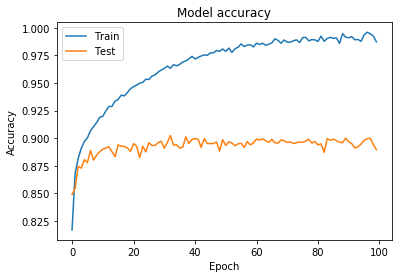

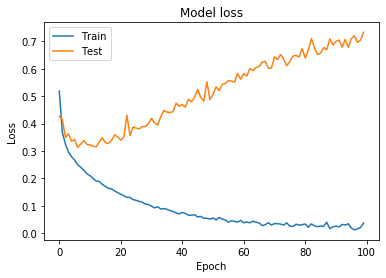

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()